In [2]:
import covasim as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import json
from scipy.optimize import minimize


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


The simulation will take place between start_day and end_day. covasim can not support simulations longer thanb 150 days

In [3]:
start_day = '2020-03-02'
end_day   = '2021-01-01'
date_range = pd.date_range(start=start_day, end=end_day, freq='D')
all_days = cv.date_range(start_day, end_day)
beta_initial=0.015

We use Gerlee et al. to have a moving beta according to the data from the traffic. 

In [4]:
# defining a moving beta accoding to the article predicting regional covid 19 hospital admissions in Sweden using mobility data

mobility='''0
-0,0436877025562212
-0,142183890633573
-0,414264196497882
-0,490226517606742
-0,520691444229291
-0,601104998394856
-0,565468289968282
-0,500887028474234
-0,533539503417897
-0,489363271950639
-0,479732407975015
-0,525650201055078
-0,4254
-0,4325
-0,394
-0,53
-0,47
-0,5
-0,53
-0,56
-0,55
-0,53
-0,5
-0,47
-0,39
-0,35
-0,34
-0,34
-0,33
-0,33
-0,32
-0,31
-0,32
-0,31
-0,42
-0,41
-0,43
-0,45
-0,44
-0,44
-0,51
-0,51
-0,66
-0,77
'''.replace(',','.').split('\n')


floatmobility = [float(i) for i in mobility if i != '']
betas = [ 4.11 + 6.68 * mob for mob in floatmobility]
betas_by_week=np.array([betas[i//7] for i in range(len(all_days))])
# coeff_betas=[betas_by_week[i+1]/betas_by_week[i] for i in range(len(betas_by_week)-1)]
coeff_betas=[betas_by_week[i]/beta_initial for i in range(len(betas_by_week))]


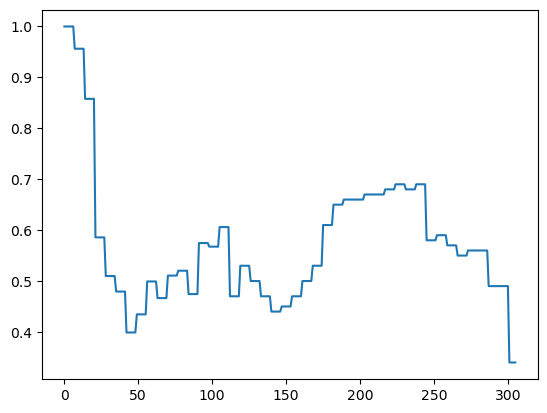

In [5]:
coef_mobility=[1+floatmobility[i] for i in range(len(floatmobility))]
coef_mobility_by_week=np.array([coef_mobility[i//7] for i in range(len(all_days))])
plt.plot(coef_mobility_by_week)


In [6]:
# storing the mobility in a csv file
store_mobility=False
if store_mobility:
    mobility_by_week=np.array([floatmobility[i//7] for i in range(len(all_days))])
    mobility_df=pd.DataFrame({'mobility': mobility_by_week})
    mobility_df.to_csv('mobility_bis.csv')


In [7]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)

The values of beta seem very high compared to the previsous values found in litrerature. 


Creating parameters that fit the Swedish population

In [8]:
# parameters_sweden=dict(pop_size=100000,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
#                                              # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

#                             start_day = start_day,
#                             end_day   = end_day,
#                             pop_type = 'hybrid',
#                             beta=3,  
#                             location = 'Sweden',
#                             pop_infected = 100, 
                            
#                             )

parameters_sweden_bis=dict(pop_size=1000000,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                                             # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

                            start_day = start_day,
                            end_day   = end_day,
                            pop_type = 'hybrid',
                            beta=0.015,  
                            location = 'Sweden',
                            pop_infected = 100, 
                            
                            )



In [39]:
5*2**13/3600

11.377777777777778

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.85 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.93 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.07 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.21 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.35 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.48 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (1.65 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (1.80 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (1.97 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.13 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (2.30 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (2.50 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (2.72 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (2.97 s)  •••••••————————————— 36

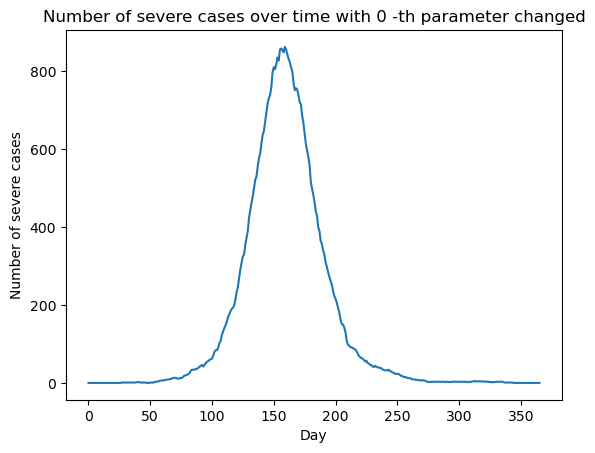

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.62 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.72 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (0.85 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (0.99 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.15 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.32 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (1.53 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (1.78 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (2.10 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.43 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (2.73 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (2.99 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (3.23 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (3.44 s)  •••••••————————————— 36

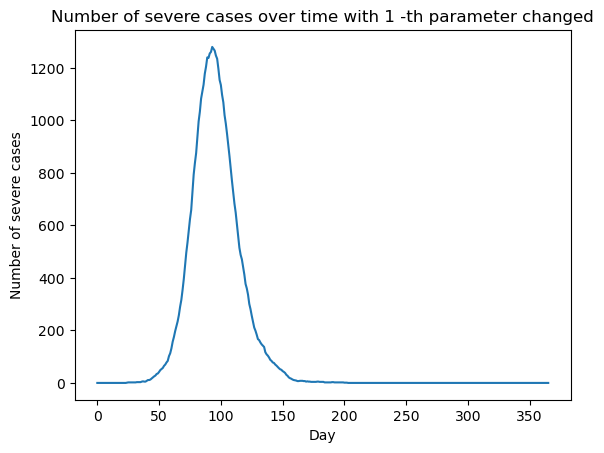

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.59 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.70 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (0.83 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (0.99 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.14 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.30 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (1.47 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (1.68 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (1.93 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.22 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (2.53 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (2.82 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (3.08 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (3.30 s)  •••••••————————————— 36

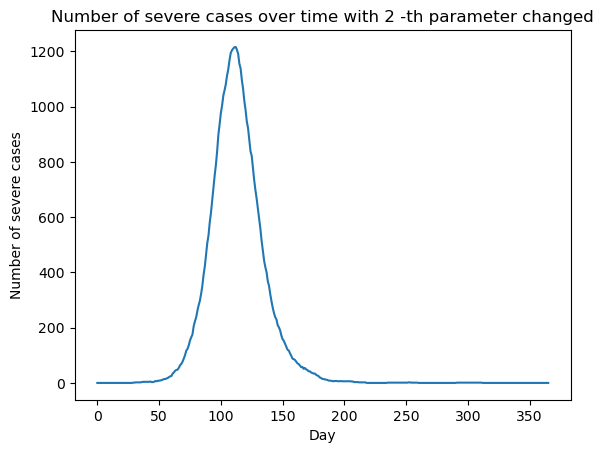

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.73 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.84 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (0.98 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.17 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.37 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.57 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (1.79 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (2.33 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (2.60 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.90 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (3.26 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (3.65 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (3.96 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (4.26 s)  •••••••————————————— 36

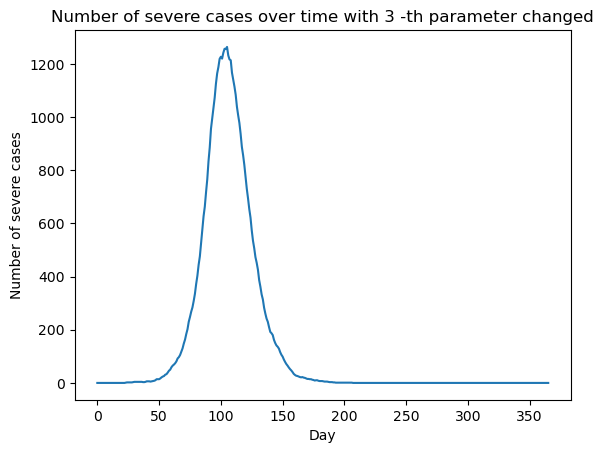

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (1.09 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (1.45 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.69 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.85 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (2.02 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (2.24 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (2.58 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (3.00 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (3.68 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (4.61 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (5.14 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (5.61 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (6.07 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (6.40 s)  •••••••————————————— 36

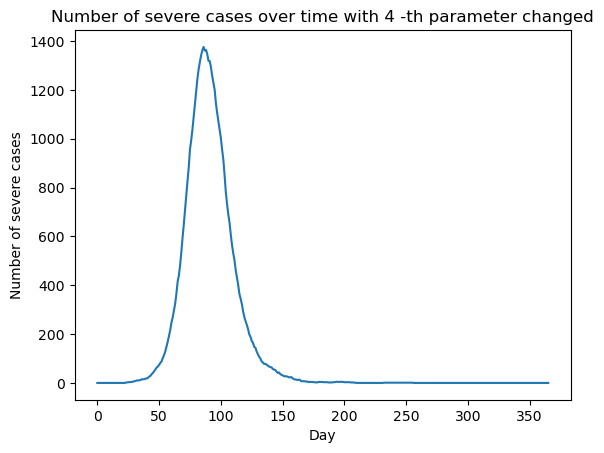

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.78 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.93 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.14 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.35 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.57 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.84 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (2.29 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (3.00 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (3.94 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (4.69 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (5.04 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (5.33 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (5.59 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (5.82 s)  •••••••————————————— 36

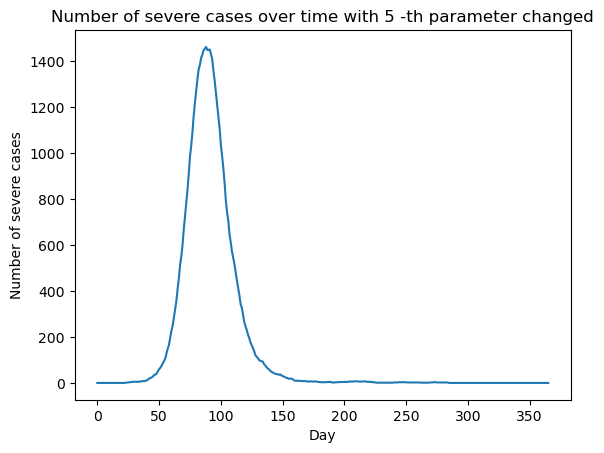

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.94 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (1.08 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.27 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.43 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.62 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.81 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (2.01 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (2.27 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (2.58 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.96 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (3.34 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (3.71 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (4.04 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (4.36 s)  •••••••————————————— 36

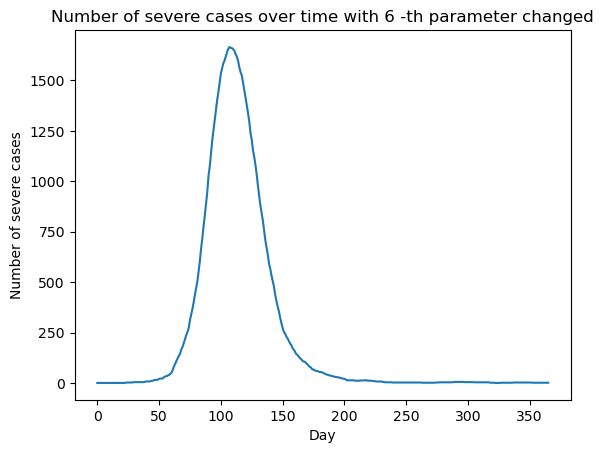

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (1.10 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (1.37 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.63 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.82 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (2.02 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (2.23 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (2.47 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (2.72 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (3.00 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (3.34 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (3.68 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (4.10 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (4.45 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (4.71 s)  •••••••————————————— 36

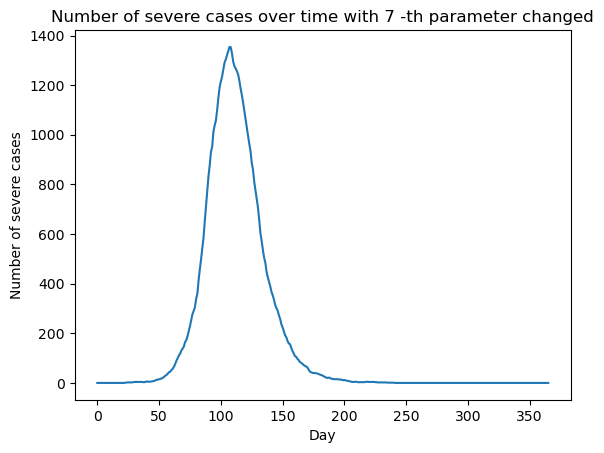

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.79 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.95 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.17 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.35 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.57 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.79 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (2.00 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (2.24 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (2.55 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.90 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (3.32 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (3.67 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (4.00 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (4.29 s)  •••••••————————————— 36

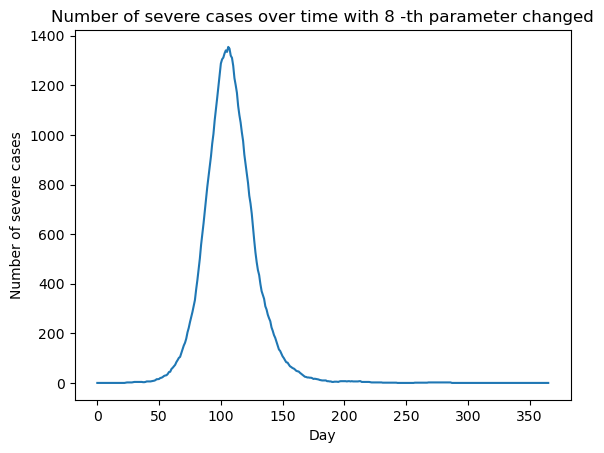

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.85 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.98 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.13 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.29 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.47 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.69 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (1.91 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (2.18 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (2.51 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.90 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (3.28 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (3.63 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (3.94 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (4.21 s)  •••••••————————————— 36

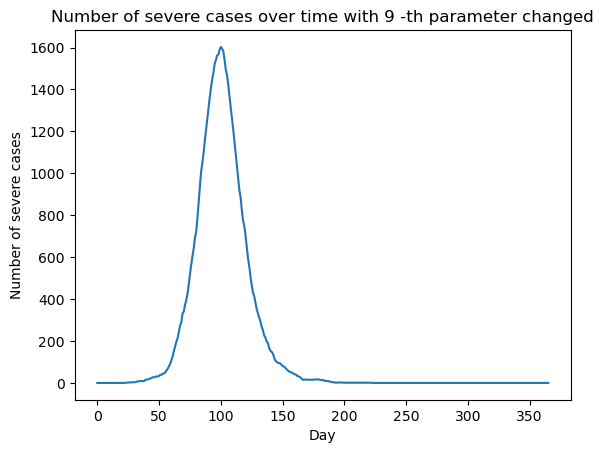

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.73 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.85 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.04 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.24 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.49 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.80 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (2.04 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (2.29 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (2.58 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (3.02 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (3.55 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (3.98 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (4.37 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (4.69 s)  •••••••————————————— 36

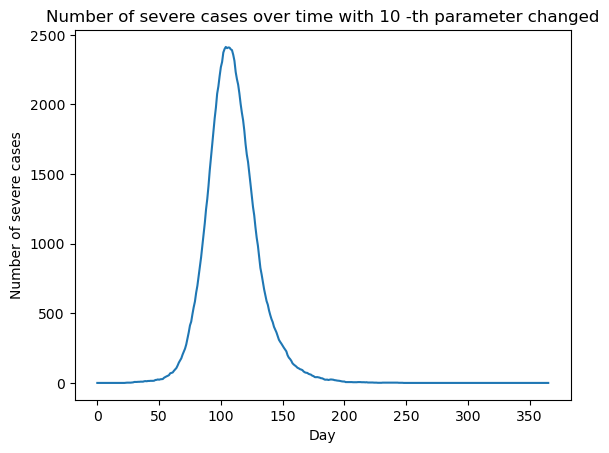

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (1.12 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (1.87 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (2.13 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (2.43 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (2.63 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (2.84 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (3.08 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (3.50 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (4.03 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (4.43 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (4.86 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (5.25 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (5.65 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (5.99 s)  •••••••————————————— 36

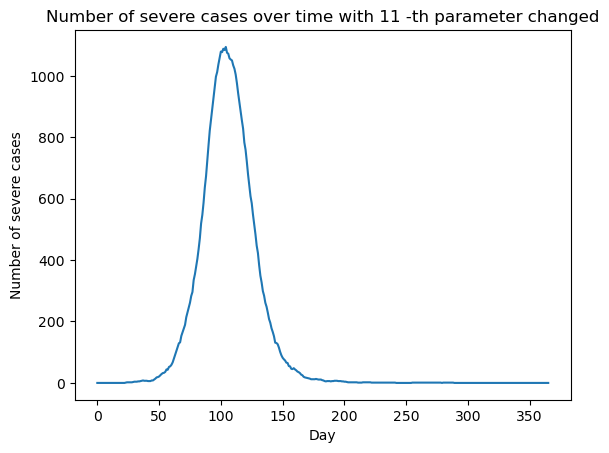

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (1.26 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (1.44 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (1.75 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (2.10 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (2.40 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (2.66 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (2.95 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (3.19 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (3.48 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (3.80 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (4.10 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (4.40 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (4.64 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (4.87 s)  •••••••————————————— 36

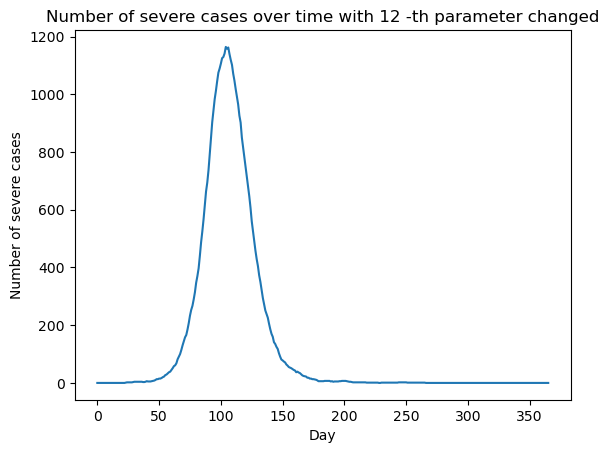

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.61 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.72 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (0.84 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (0.99 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.13 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.29 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (1.45 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (1.64 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (1.87 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.15 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (2.45 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (2.73 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (2.98 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (3.20 s)  •••••••————————————— 36

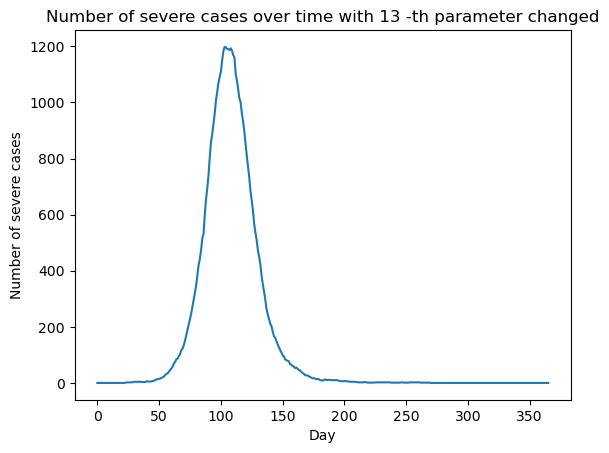

In [13]:
all_simuls=[]
for i in range(14): 
    coefs = [ 1 for _ in range(14)]
    coefs[i]=2
    params_custom = dict(
    pop_size=50000,
    start_day='2020-03-01',
    end_day='2021-03-01',
    pop_type='hybrid',
    beta=0.015,
    location='Sweden',
    pop_infected=10,
    dur={
        'exp2inf': {'dist':'lognormal_int', 'par1':4.5*coefs[0], 'par2':1.5}, # par 1 = mean of the log normal distrib, par 2 = std of the log normal distrib. par1 represents the expected value of the number of days between exposure and infection
        'inf2sym': {'dist':'lognormal_int', 'par1':1.1*coefs[1], 'par2':0.9},
        'sym2sev': {'dist':'lognormal_int', 'par1':6.6*coefs[2], 'par2':4.9},
        'sev2crit': {'dist':'lognormal_int', 'par1':1.5*coefs[3], 'par2':2.0},
        'asym2rec': {'dist':'lognormal_int', 'par1':8.0*coefs[4], 'par2':2.0},
        'mild2rec': {'dist':'lognormal_int', 'par1':8.0*coefs[5], 'par2':2.0},
        'sev2rec': {'dist':'lognormal_int', 'par1':18.1*coefs[6], 'par2':6.3},
        'crit2rec': {'dist':'lognormal_int', 'par1':18.1*coefs[7], 'par2':6.3},
        'crit2die': {'dist':'lognormal_int', 'par1':10.7*coefs[8], 'par2':4.8},
    }, 
    rel_symp_prob= 1.0*coefs[9],
    rel_severe_prob=1.0*coefs[10],
    rel_crit_prob=1.0*coefs[11],
    rel_death_prob=1.0*coefs[12]
    )
    
    # Define mobility coefficients and interventions
    all_days = cv.date_range(params_custom['start_day'], params_custom['end_day'])
    coef_mobility_custom = [1 for _ in range(len(all_days))]
    interventions_custom = cv.change_beta(days=all_days, changes=coef_mobility_custom, do_plot=False)

    # Create and run the simulation
    mysimul = cv.Sim(params_custom, interventions=interventions_custom)
    mysimul.run()
    all_simuls.append(np.array(mysimul.results['n_severe']))
    # Plot results
    plt.plot(mysimul.results['n_severe'])
    plt.xlabel('Day')
    plt.ylabel('Number of severe cases')
    plt.title('Number of severe cases over time with '+ str(i)+' -th parameter changed')
    plt.show()



In [19]:
def diff_between_2_arrays(array1, array2): 
    return np.sum([abs(array1[i]-array2[i]) for i in range(len(array1))])

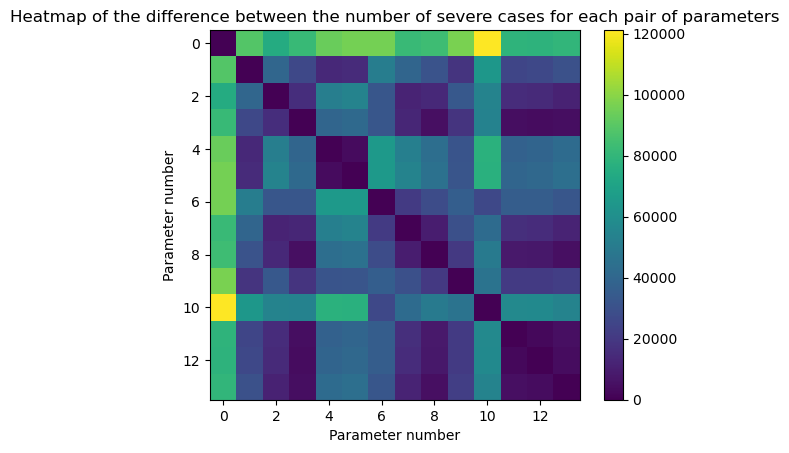

In [27]:
# heatmap of the difference between arrays : 
diffs=[]
for i in range(14): 
    diffs.append([diff_between_2_arrays(all_simuls[i], all_simuls[j]) for j in range(14)])
plt.imshow(diffs)
plt.colorbar()
plt.title('Heatmap of the difference between the number of severe cases for each pair of parameters')
plt.xlabel('Parameter number')
plt.ylabel('Parameter number')

plt.show()




Text(0.5, 1.0, 'Number of severe cases over time with 4th and 6th parameters doubled')

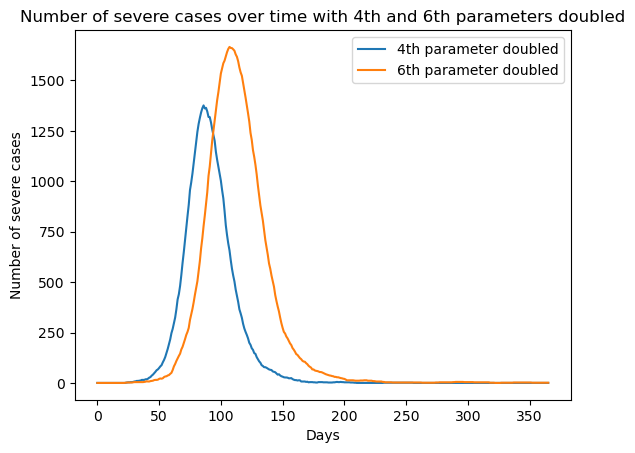

In [36]:
plt.plot(all_simuls[4], label='4th parameter doubled')
plt.plot(all_simuls[6], label='6th parameter doubled')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Number of severe cases')
plt.title('Number of severe cases over time with 4th and 6th parameters doubled')

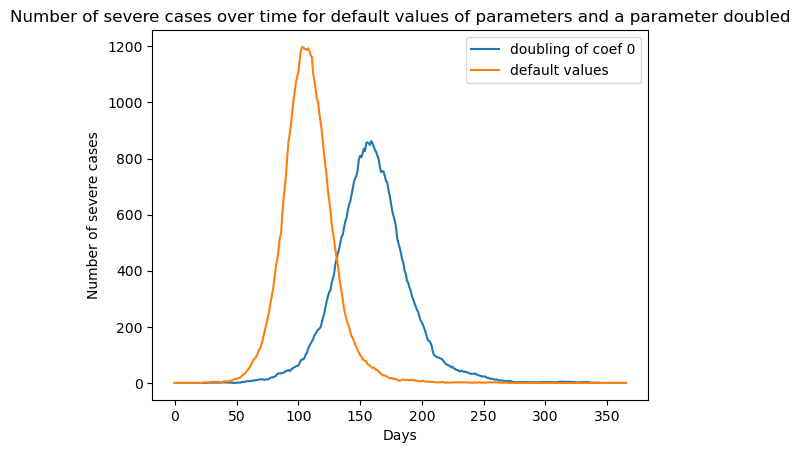

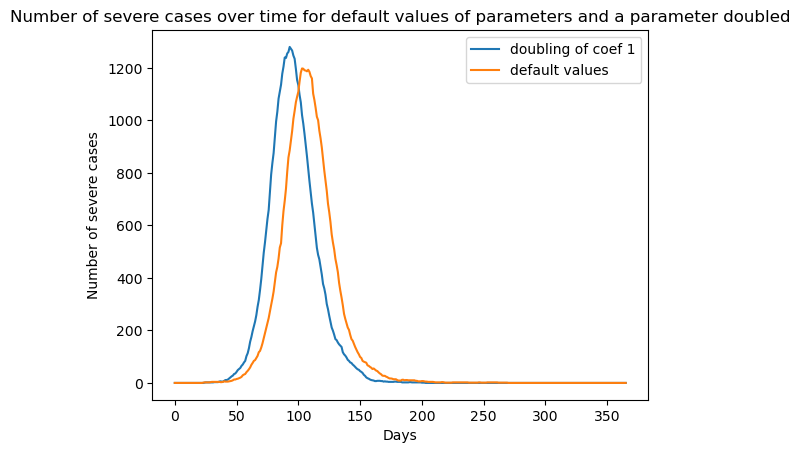

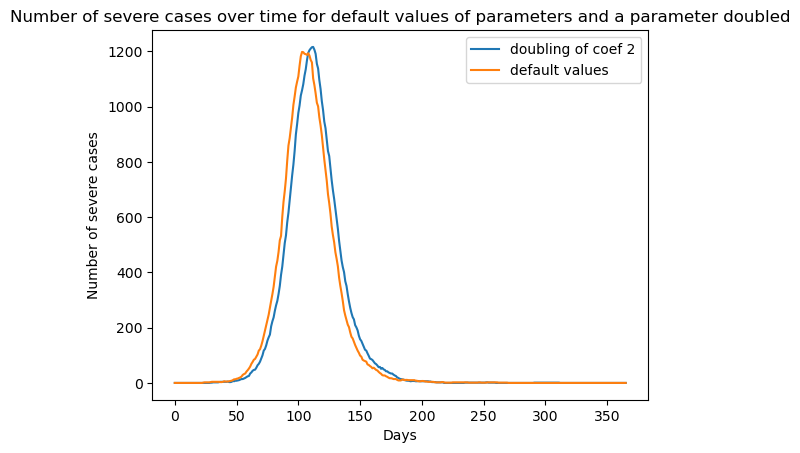

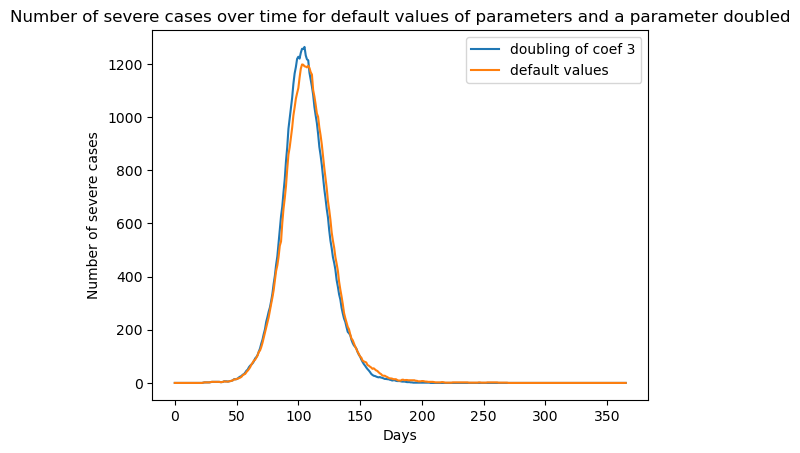

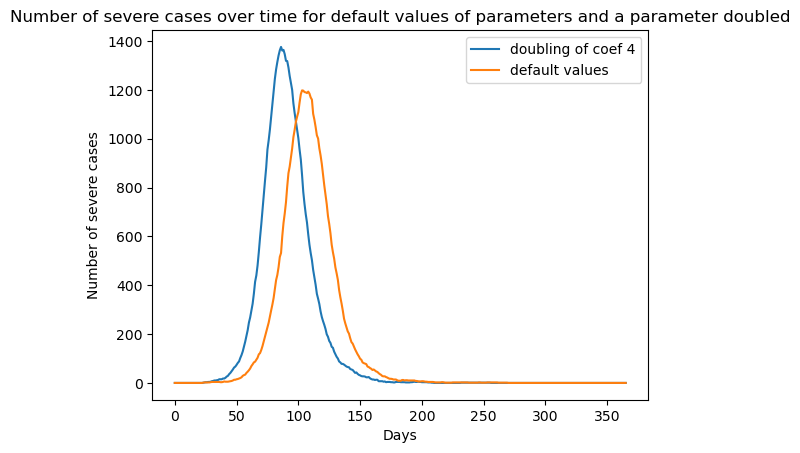

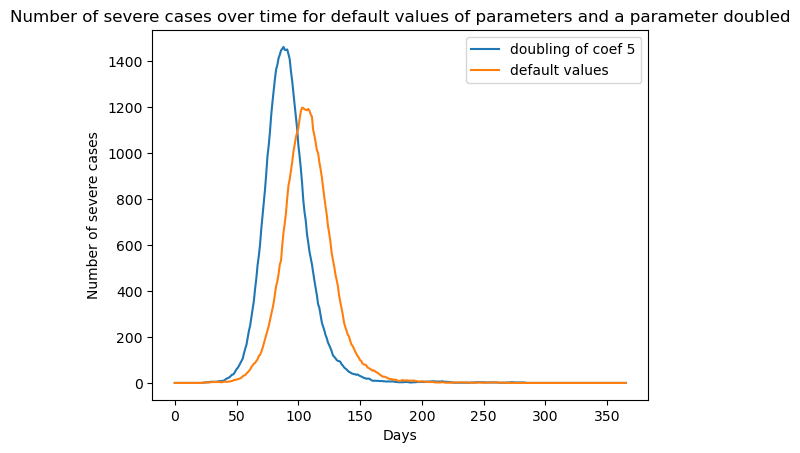

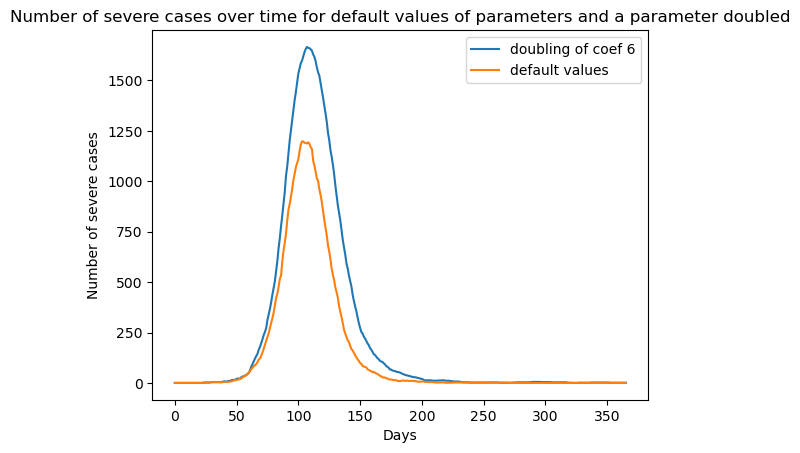

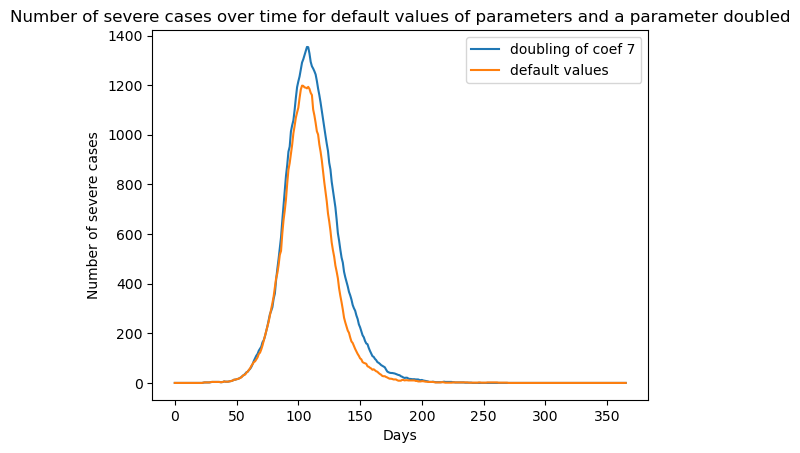

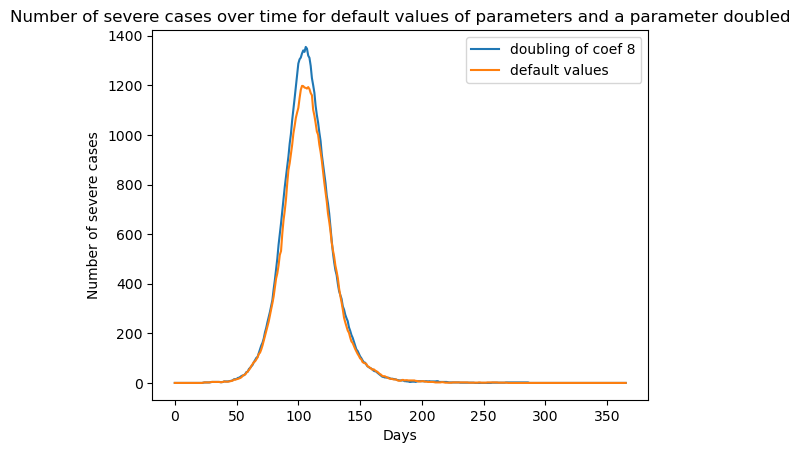

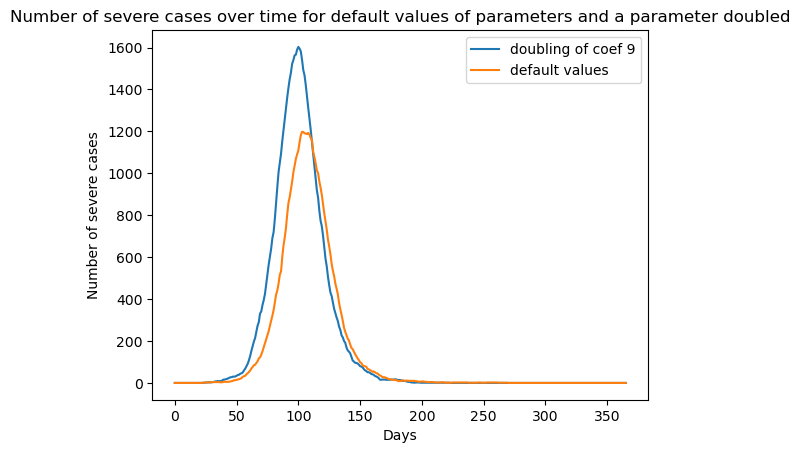

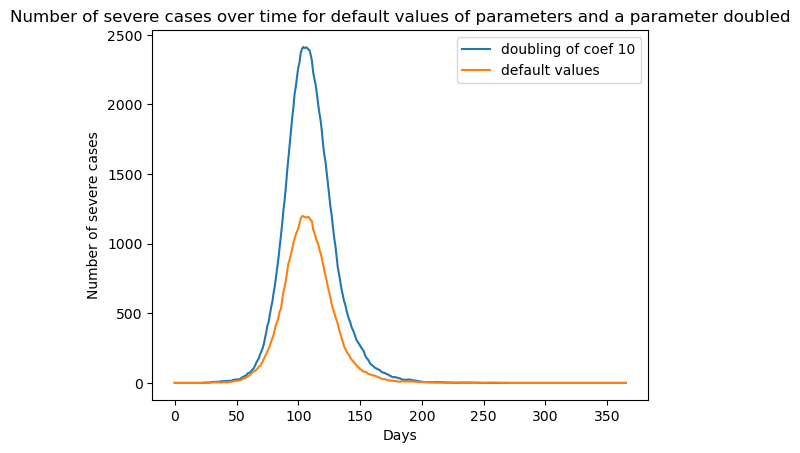

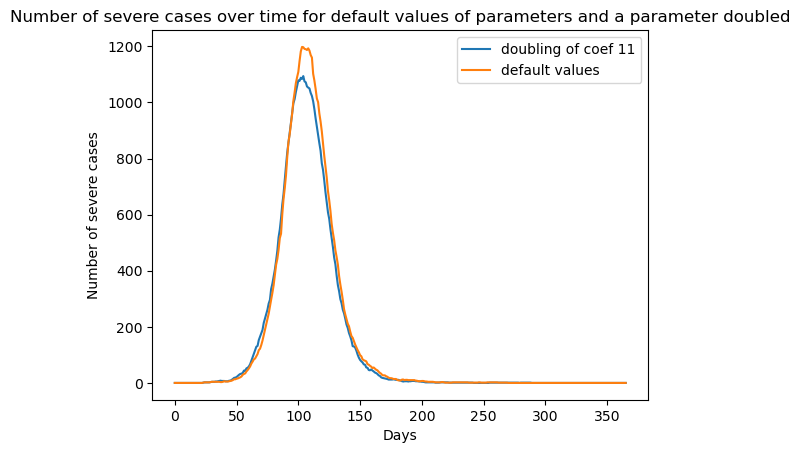

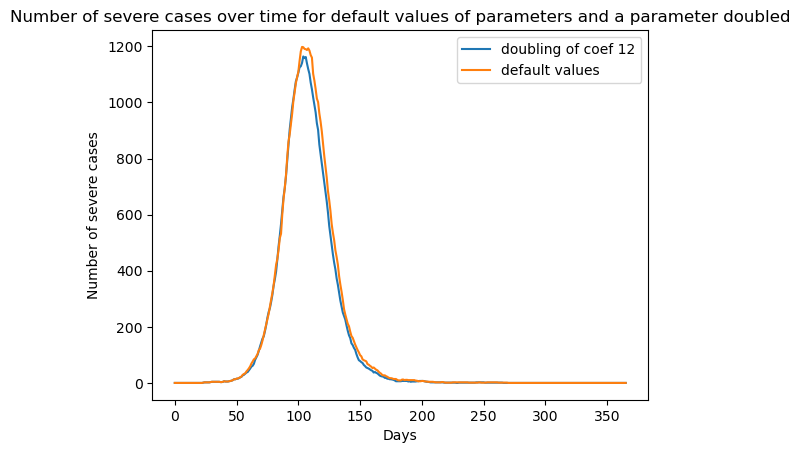

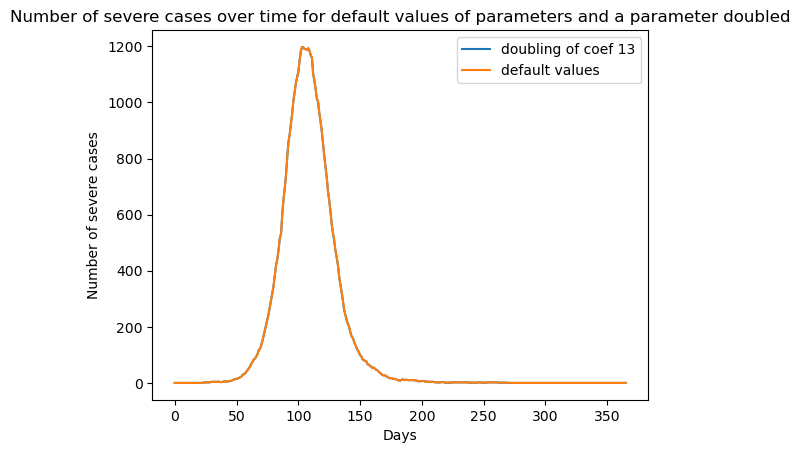

In [30]:
for i in range(14): 
    plt.plot(all_simuls[i], label='doubling of coef '+str(i))
    plt.plot(all_simuls[-1], label='default values')
    plt.legend()
    plt.title('Number of severe cases over time for default values of parameters and a parameter doubled')
    plt.xlabel('Days')
    plt.ylabel('Number of severe cases')
    plt.show()

Initializing sim with 50000 people for 365 days
Loading location-specific data for "Sweden"
  Running 2020-03-01 ( 0/365) (0.66 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (0.76 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (0.92 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (1.12 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (1.27 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (1.45 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (1.61 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (1.78 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (2.02 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (2.35 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (2.66 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (2.97 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (3.22 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (3.46 s)  •••••••————————————— 36

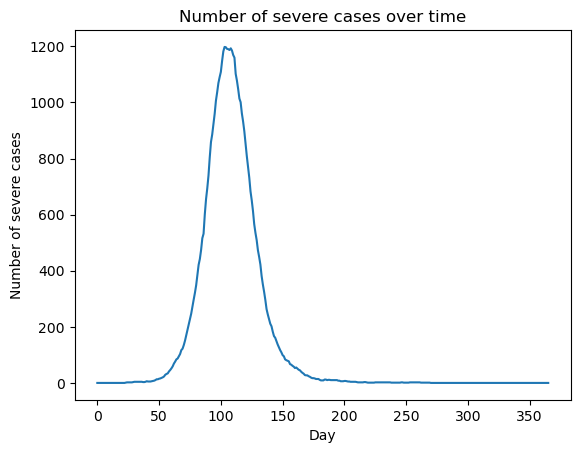

In [17]:
import covasim as cv
import matplotlib.pyplot as plt

# Define the parameters including the duration parameters
params_custom = dict(
    pop_size=50000,
    start_day='2020-03-01',
    end_day='2021-03-01',
    pop_type='hybrid',
    beta=0.015,
    location='Sweden',
    pop_infected=10,
    dur={
        'exp2inf': {'dist':'lognormal_int', 'par1':4.5, 'par2':1.5}, # par 1 = mean of the log normal distrib, par 2 = std of the log normal distrib. par1 represents the expected value of the number of days between exposure and infection
        'inf2sym': {'dist':'lognormal_int', 'par1':1.1, 'par2':0.9},
        'sym2sev': {'dist':'lognormal_int', 'par1':6.6, 'par2':4.9},
        'sev2crit': {'dist':'lognormal_int', 'par1':1.5, 'par2':2.0},
        'asym2rec': {'dist':'lognormal_int', 'par1':8.0, 'par2':2.0},
        'mild2rec': {'dist':'lognormal_int', 'par1':8.0, 'par2':2.0},
        'sev2rec': {'dist':'lognormal_int', 'par1':18.1, 'par2':6.3},
        'crit2rec': {'dist':'lognormal_int', 'par1':18.1, 'par2':6.3},
        'crit2die': {'dist':'lognormal_int', 'par1':10.7, 'par2':4.8},
    }, 
    rel_symp_prob= 1.0,
    rel_severe_prob=1.0,
    rel_crit_prob=1.0,
    rel_death_prob=1.0
)

# Define mobility coefficients and interventions
all_days = cv.date_range(params_custom['start_day'], params_custom['end_day'])
coef_mobility_custom = [1 for _ in range(len(all_days))]
interventions_custom = cv.change_beta(days=all_days, changes=coef_mobility_custom, do_plot=False)

# Create and run the simulation
mysimul = cv.Sim(params_custom, interventions=interventions_custom)
mysimul.run()

# Plot results
plt.plot(mysimul.results['n_severe'])
plt.xlabel('Day')
plt.ylabel('Number of severe cases')
plt.title('Number of severe cases over time')
plt.show()


In [33]:
for key in keys : 
    if 'inf' in key : 
        print(key)

pop_infected


In [22]:
keys= ['pop_size', 'pop_infected', 'pop_type', 'location', 'start_day', 'end_day', 'n_days', 'rand_seed', 'verbose', 'pop_scale', 'scaled_pop', 'rescale', 'rescale_threshold', 'rescale_factor', 'frac_susceptible', 'contacts', 'dynam_layer', 'beta_layer', 'beta_dist', 'viral_dist', 'beta', 'asymp_factor', 'n_imports', 'n_variants', 'use_waning', 'nab_init', 'nab_decay', 'nab_kin', 'nab_boost', 'nab_eff', 'rel_imm_symp', 'immunity', 'trans_redux', 'rel_beta', 'dur', 'rel_symp_prob', 'rel_severe_prob', 'rel_crit_prob', 'rel_death_prob', 'prog_by_age', 'prognoses', 'iso_factor', 'quar_factor', 'quar_period', 'interventions', 'analyzers', 'timelimit', 'stopping_func', 'n_beds_hosp', 'n_beds_icu', 'no_hosp_factor', 'no_icu_factor', 'vaccine_pars', 'vaccine_map', 'variants', 'variant_map', 'variant_pars']

In [13]:
# interventions of changing beta: we create a cv.change_beta object that changes beta everyday according to the values of the traffic circulation. 
# cb_mobility = cv.change_beta(days=all_days, changes=coeff_betas, do_plot=False) # warning, change_beta does not change the value of beta, it multiplies the value of beta_0 by a constant and replaces the previois beta by this new one. 
cb_mobility_2= cv.change_beta(days=all_days, changes=coef_mobility_by_week, do_plot=False)

Initializing sim with 1000000 people for 305 days
Loading location-specific data for "Sweden"
  Running 2020-03-02 ( 0/305) (7.48 s)  ———————————————————— 0%
  Running 2020-03-12 (10/305) (9.12 s)  ———————————————————— 4%
  Running 2020-03-22 (20/305) (10.78 s)  •——————————————————— 7%
  Running 2020-04-01 (30/305) (12.37 s)  ••—————————————————— 10%
  Running 2020-04-11 (40/305) (14.05 s)  ••—————————————————— 13%
  Running 2020-04-21 (50/305) (15.69 s)  •••————————————————— 17%
  Running 2020-05-01 (60/305) (17.37 s)  •••————————————————— 20%
  Running 2020-05-11 (70/305) (19.06 s)  ••••———————————————— 23%
  Running 2020-05-21 (80/305) (21.03 s)  •••••——————————————— 26%
  Running 2020-05-31 (90/305) (22.90 s)  •••••——————————————— 30%
  Running 2020-06-10 (100/305) (24.81 s)  ••••••—————————————— 33%
  Running 2020-06-20 (110/305) (26.74 s)  •••••••————————————— 36%
  Running 2020-06-30 (120/305) (28.74 s)  •••••••————————————— 40%
  Running 2020-07-10 (130/305) (30.78 s)  ••••••••

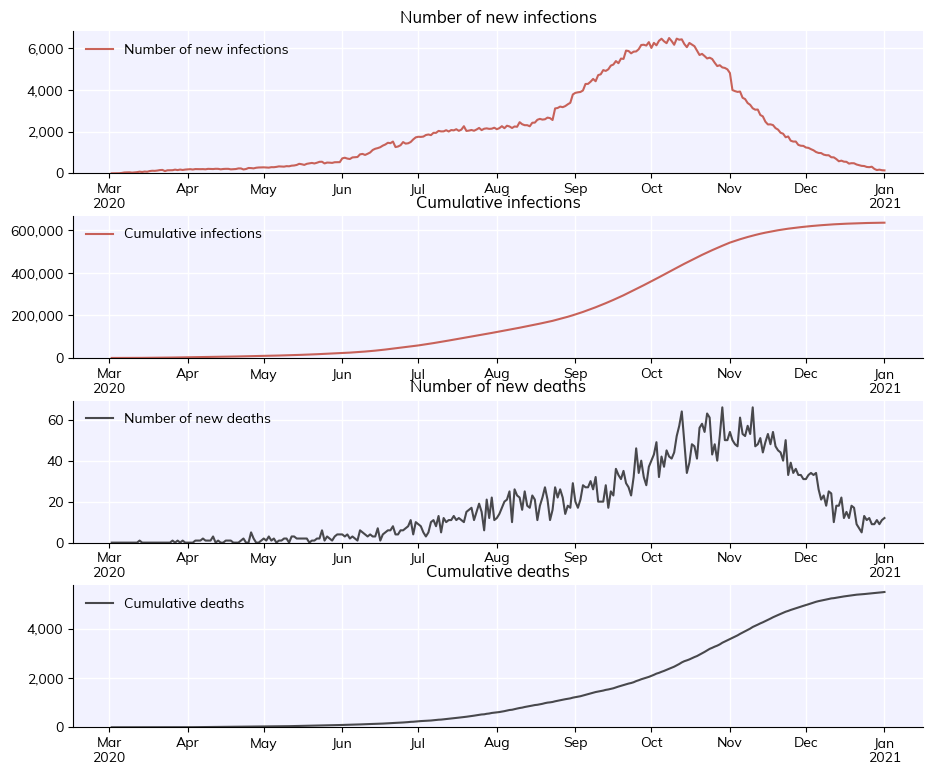

In [11]:
# set run_simul = True to run the simulation and create data : 
run_simul=True
if run_simul: 
    my_simulation_sweden_interventions2=cv.Sim(parameters_sweden_bis, interventions=cb_mobility_2)
    my_simulation_sweden_interventions2.run()
    my_simulation_sweden_interventions2.plot([ 'new_infections', 'cum_infections', 'new_deaths', 'cum_deaths'])

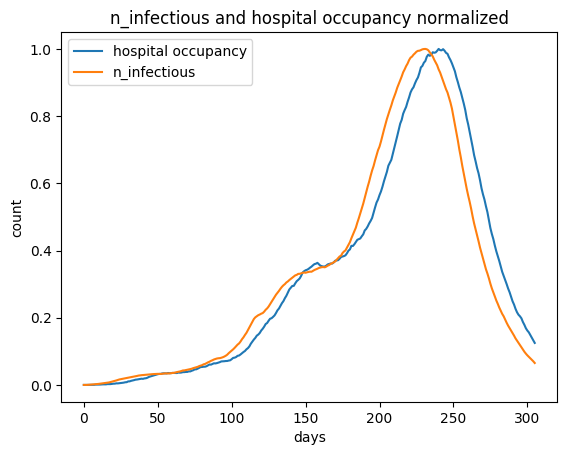

In [32]:
# plt.plot(my_simulation_sweden_interventions2.results['new_deaths'], label='new_deaths')
# plt.plot(my_simulation_sweden_interventions2.results['n_severe'], label='n_severe')
plt.plot(my_simulation_sweden_interventions2.results['n_severe']/np.max(np.array(my_simulation_sweden_interventions2.results['n_severe'])), label='hospital occupancy')

plt.xlabel('days')
plt.ylabel('count')
# plt.show()

plt.plot(my_simulation_sweden_interventions2.results['n_infectious']/np.max(np.array(my_simulation_sweden_interventions2.results['n_infectious'])), label='n_infectious')
# plt.xlabel('days')
# plt.ylabel('new infectious')
plt.title('n_infectious and hospital occupancy normalized')
plt.legend()



In [21]:
n_infectious=np.array(my_simulation_sweden_interventions2.results['n_infectious'])

In [16]:
hospitalized=np.array(my_simulation_sweden_interventions2.results['n_severe'])

In [23]:
pd.DataFrame({'hospitalized' : hospitalized, 'n_infectious' : n_infectious}).to_csv('hopitalized_and_infectious.csv')

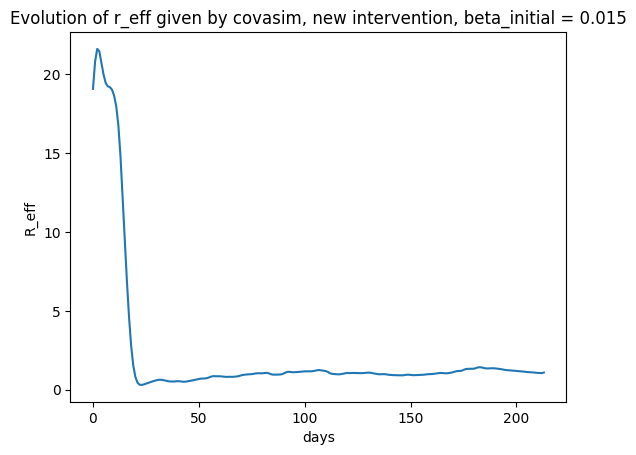

In [37]:
# plt.plot(n_infected[:40])
plt.plot(my_simulation_sweden_interventions2.compute_r_eff())
plt.title('Evolution of r_eff given by covasim, new intervention, beta_initial = 0.015')
plt.xlabel('days')
plt.ylabel('R_eff')
plt.show()

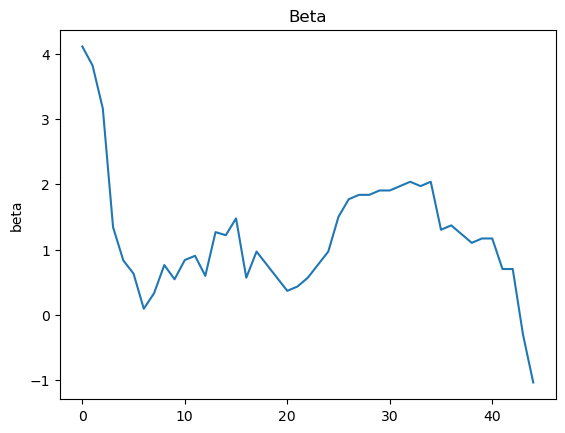

In [8]:
plt.plot(np.array(betas))
plt.title('Beta')
plt.ylabel('beta')
plt.show()


Initializing sim with 1000000 people for 121 days
Loading location-specific data for "Sweden"
  Running 2020-03-02 ( 0/121) (11.67 s)  ———————————————————— 1%
  Running 2020-03-12 (10/121) (14.75 s)  •——————————————————— 9%
  Running 2020-03-22 (20/121) (18.08 s)  •••————————————————— 17%
  Running 2020-04-01 (30/121) (21.43 s)  •••••——————————————— 25%
  Running 2020-04-11 (40/121) (24.91 s)  ••••••—————————————— 34%
  Running 2020-04-21 (50/121) (28.21 s)  ••••••••———————————— 42%
  Running 2020-05-01 (60/121) (31.61 s)  ••••••••••—————————— 50%
  Running 2020-05-11 (70/121) (35.26 s)  •••••••••••————————— 58%
  Running 2020-05-21 (80/121) (39.68 s)  •••••••••••••——————— 66%
  Running 2020-05-31 (90/121) (45.22 s)  ••••••••••••••—————— 75%
  Running 2020-06-10 (100/121) (52.64 s)  ••••••••••••••••———— 83%
  Running 2020-06-20 (110/121) (60.77 s)  ••••••••••••••••••—— 91%
  Running 2020-06-30 (120/121) (68.62 s)  •••••••••••••••••••— 99%
Simulation summary:
      889,845 cumulative in

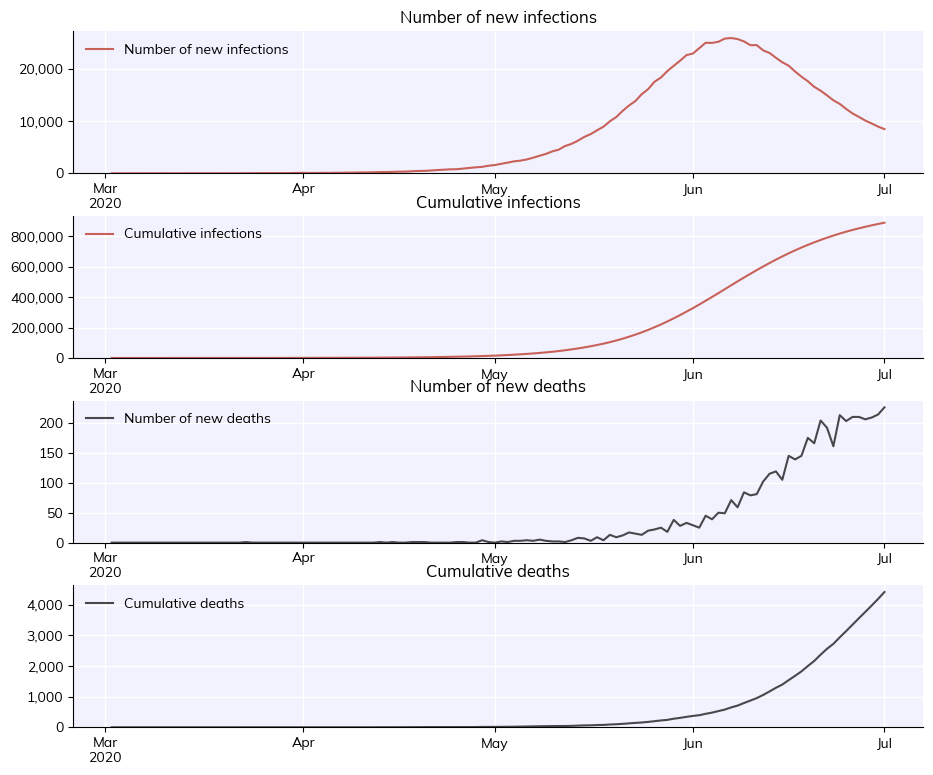

In [32]:
# set run_simul = True to run the simulation and create data : 
run_simul=True
if run_simul: 
    my_simulation_sweden_interventions2=cv.Sim(parameters_sweden)
    my_simulation_sweden_interventions2.run()
    my_simulation_sweden_interventions2.plot([ 'new_infections', 'cum_infections', 'new_deaths', 'cum_deaths'])


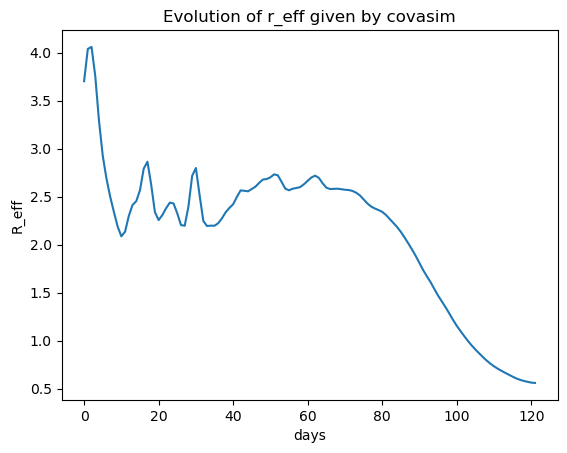

In [34]:
# plt.plot(n_infected[:40])
plt.plot(my_simulation_sweden_interventions2.compute_r_eff())
plt.title('Evolution of r_eff given by covasim')
plt.xlabel('days')
plt.ylabel('R_eff')
plt.show()

Initializing sim with 1000000 people for 121 days
Loading location-specific data for "Sweden"
  Running 2020-03-02 ( 0/121) (13.46 s)  ———————————————————— 1%
  Running 2020-03-12 (10/121) (17.82 s)  •——————————————————— 9%
  Running 2020-03-22 (20/121) (26.39 s)  •••————————————————— 17%
  Running 2020-04-01 (30/121) (37.15 s)  •••••——————————————— 25%
  Running 2020-04-11 (40/121) (48.56 s)  ••••••—————————————— 34%
  Running 2020-04-21 (50/121) (59.17 s)  ••••••••———————————— 42%
  Running 2020-05-01 (60/121) (70.57 s)  ••••••••••—————————— 50%
  Running 2020-05-11 (70/121) (82.77 s)  •••••••••••————————— 58%
  Running 2020-05-21 (80/121) (93.82 s)  •••••••••••••——————— 66%
  Running 2020-05-31 (90/121) (105.35 s)  ••••••••••••••—————— 75%
  Running 2020-06-10 (100/121) (115.45 s)  ••••••••••••••••———— 83%
  Running 2020-06-20 (110/121) (126.19 s)  ••••••••••••••••••—— 91%
  Running 2020-06-30 (120/121) (137.09 s)  •••••••••••••••••••— 99%
Simulation summary:
    5,702,320 cumulativ

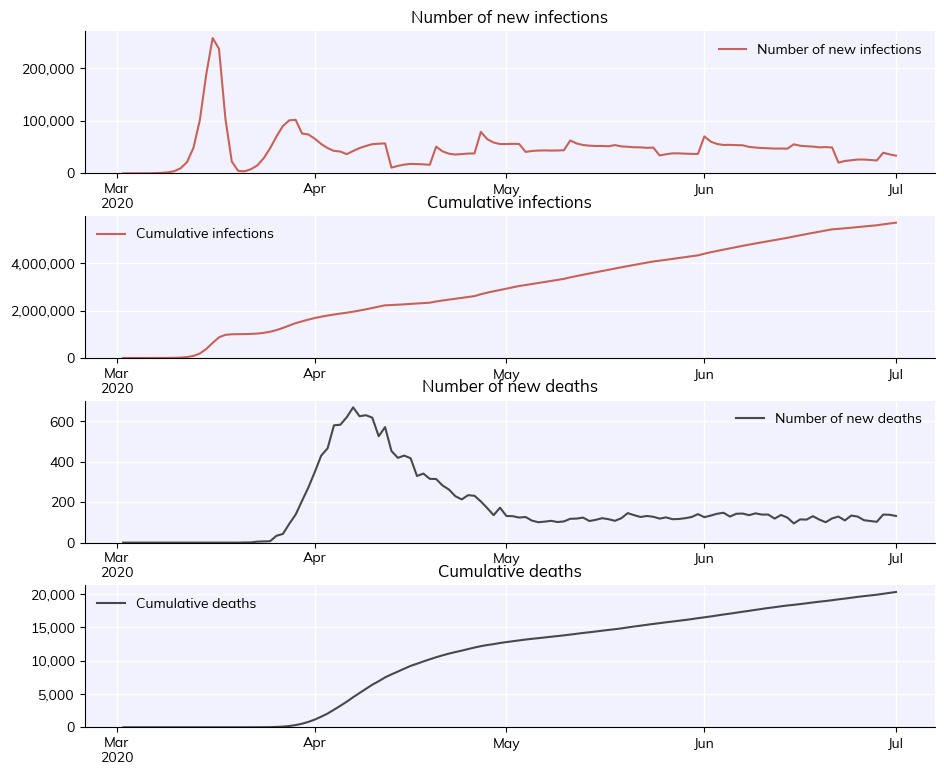

In [27]:
# set run_simul = True to run the simulation and create data : 
run_simul=True
if run_simul: 
    my_simulation_sweden_interventions=cv.Sim(parameters_sweden, interventions=cb_mobility)
    my_simulation_sweden_interventions.run()
    my_simulation_sweden_interventions.plot([ 'new_infections', 'cum_infections', 'new_deaths', 'cum_deaths'])


In [29]:
my_simulation_sweden_interventions.compute_r_eff()

array([1.15794520e+02, 1.26321295e+02, 1.33551753e+02, 1.36248741e+02,
       1.35636921e+02, 1.33533652e+02, 1.30496182e+02, 1.27313053e+02,
       1.24692759e+02, 1.22500651e+02, 1.19864187e+02, 1.14537455e+02,
       1.02860707e+02, 8.22581375e+01, 5.50669259e+01, 2.89614453e+01,
       1.12016985e+01, 2.95922381e+00, 5.16776878e-01, 1.09523779e-01,
       1.09855552e-01, 1.92546085e-01, 3.38036177e-01, 5.55994024e-01,
       8.40701458e-01, 1.15871206e+00, 1.42727052e+00, 1.54032891e+00,
       1.49130560e+00, 1.36653447e+00, 1.20091381e+00, 1.00107489e+00,
       8.17308885e-01, 6.87571628e-01, 6.10647106e-01, 5.88956774e-01,
       6.31264419e-01, 7.19371841e-01, 8.21263327e-01, 9.18729102e-01,
       9.45956021e-01, 7.87252314e-01, 5.06839119e-01, 3.38327409e-01,
       3.33329999e-01, 3.69474392e-01, 3.90669250e-01, 4.66184350e-01,
       7.16415346e-01, 1.06255003e+00, 1.26557178e+00, 1.30814513e+00,
       1.33599418e+00, 1.38327625e+00, 1.50154115e+00, 1.82309919e+00,
      

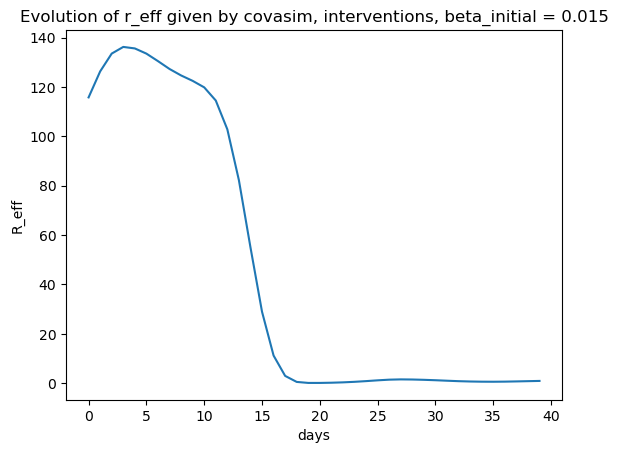

In [29]:
# plt.plot(n_infected[:40])
plt.plot(my_simulation_sweden_interventions.compute_r_eff()[:40])
plt.title('Evolution of r_eff given by covasim, interventions, beta_initial = 0.015')
plt.xlabel('days')
plt.ylabel('R_eff')
plt.show()

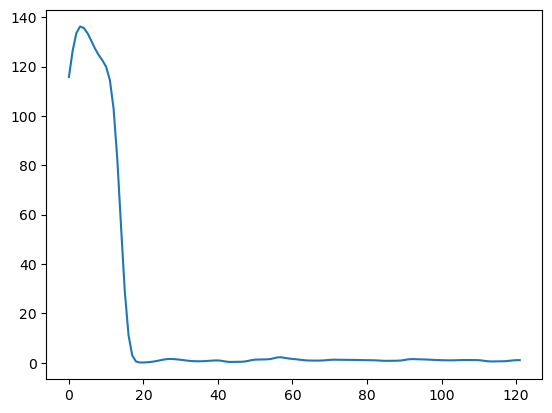

In [11]:
plt.plot(my_simulation_sweden_interventions.compute_r_eff())

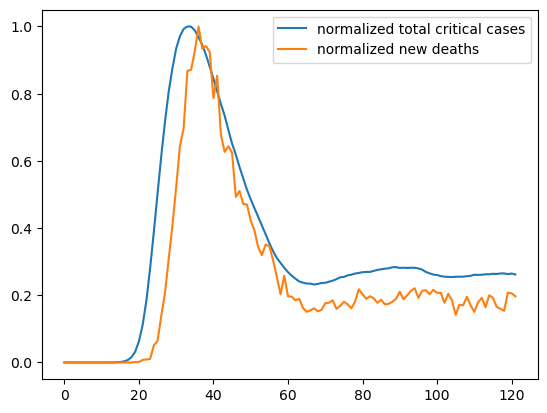

In [12]:
plt.plot(my_simulation_sweden_interventions.results['n_critical']/max(my_simulation_sweden_interventions.results['n_critical']), label='normalized total critical cases')
plt.plot(my_simulation_sweden_interventions.results['new_deaths']/max(my_simulation_sweden_interventions.results['new_deaths']), label='normalized new deaths')
plt.legend()
plt.show()


We have stored in a csv file the synthetized data and extract it as a baseline: 

In [13]:
df = pd.read_csv('deaths_and_infections.csv')
# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)

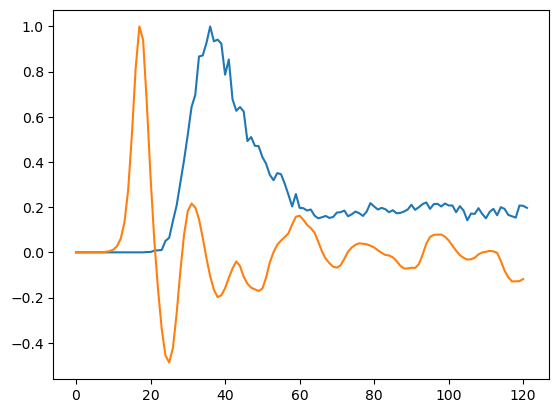

In [14]:
new_deaths=np.array(df['new_deaths'])
n_infected=np.array(df['n_infected'])
new_infected=np.array([n_infected[i+1] - n_infected[i] for i in range(len(n_infected) -1)])
plt.plot(new_deaths/max(new_deaths))
plt.plot(new_infected/max(new_infected))

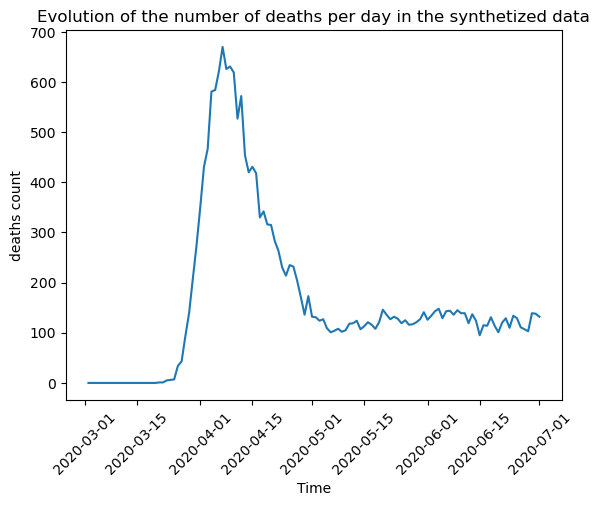

In [15]:
plt.plot(date_range, df['new_deaths'], label='new_deaths')
plt.title('Evolution of the number of deaths per day in the synthetized data')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('deaths count')

plt.show()

In [16]:
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

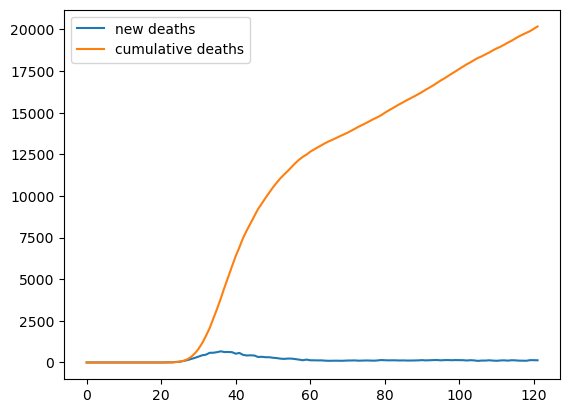

In [17]:
plt.plot(dates_of_pandemic,new_deaths, label='new deaths')
plt.plot(dates_of_pandemic,death_cumul, label='cumulative deaths')
plt.legend()
plt.show()

We try to fit some simple models

In [18]:
def exponential_func(x, a, b, c):
    return a*np.exp(b*x)+c

In [19]:
def polynomla_func(x, a, b, c, d, e , f):
    return a*x**2+b*x+c + e*x**3 

In [20]:
p, _ =curve_fit(exponential_func, dates_of_pandemic, new_deaths)
p
p2, _ =curve_fit(polynomla_func, dates_of_pandemic, new_deaths)


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


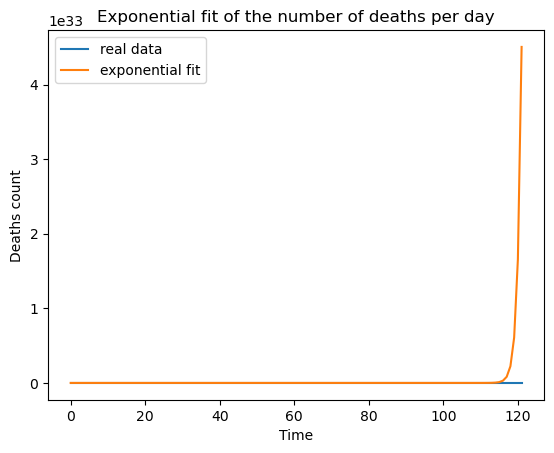

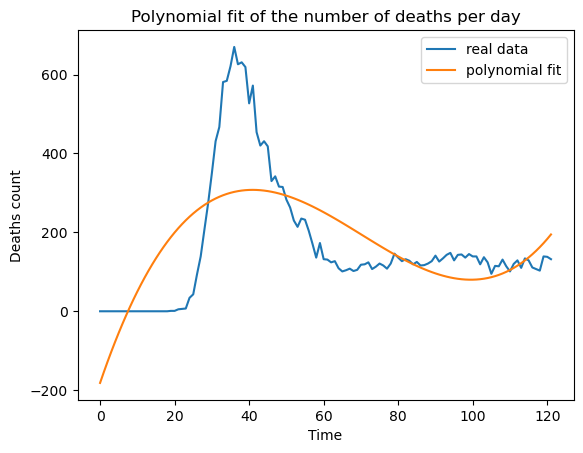

In [21]:
plt.plot(dates_of_pandemic,new_deaths, label='real data')
plt.plot(dates_of_pandemic, exponential_func(dates_of_pandemic, *p), label= 'exponential fit')
plt.title('Exponential fit of the number of deaths per day')
plt.xlabel('Time')
plt.ylabel('Deaths count')

plt.legend()
plt.show()

plt.plot(dates_of_pandemic,new_deaths,  label='real data')
plt.plot(dates_of_pandemic, polynomla_func(dates_of_pandemic, *p2), label= 'polynomial fit')
plt.title('Polynomial fit of the number of deaths per day')
plt.xlabel('Time')
plt.ylabel('Deaths count')

plt.legend()
plt.show()


